In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import johnson_lindenstrauss_min_dim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [27]:
data = pd.read_csv("/Users/odettesaenz/M375T/MNIST_CSV/mnist_train.csv", header=None)

In [28]:
data.head() # showing the first 5 rows

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# data matrix and labels
x= data.iloc[:, 1:] # pixel representing number
y = np.array(data.iloc[:,0]) # Label number

print("The dimension of our data matrix is:",x.shape)
print("The number of labels we have is:", y.shape)

The dimension of our data matrix is: (60000, 784)
The number of labels we have is: (60000,)


In [30]:
# Splitting data 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## KNN Without Projecting Data

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ==========================
# Initialize the K-Nearest Neighbors (KNN) Classifier
# ==========================
# The K-Nearest Neighbors algorithm classifies a data point based on the majority 
# label of its 'k' closest neighbors. 
# Set k = 3, for each classification 
# determined by 3 nearest neighbors in the training data.
knn = KNeighborsClassifier(n_neighbors=3)

# ==========================
# Train the KNN Model
# ==========================
# The model learns from the labeled training data (X_train, y_train).
knn.fit(X_train, y_train)

# ==========================
# Make Predictions on the Test Set
# ==========================
# The model predicts the labels for the unseen test data (X_test).
# Each test sample is classified based on its nearest training samples.
y_pred = knn.predict(X_test)

# ==========================
# Evaluate Model Accuracy
# ==========================
# The accuracy score measures how well the model performed.
# It compares the predicted labels (y_pred) with the actual labels (y_test)
# and calculates the percentage of correct predictions.
accuracy = accuracy_score(y_test, y_pred)

# ==========================
# Display the Accuracy Score
# ==========================
# The accuracy is printed as a percentage with two decimal places.
# A higher accuracy indicates better model performance.
print(f"Accuracy of KNN Classifier: {accuracy * 100:.2f}%")

Accuracy of KNN Classifier: 97.27%


## KNN using RP

In [37]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ============================================
# Loop Through Different Reduced Dimensions
# ============================================
# We test the effect of dimensionality reduction by applying Gaussian Random Projection 
# to reduce data dimensions to different levels: 50.
for dim in [50]:    
    # ============================================
    # Apply Gaussian Random Projection
    # ============================================
    # Gaussian Random Projection is a dimensionality reduction technique that projects 
    # high-dimensional data into a lower-dimensional space while preserving distances.
    # Here, we initialize it to reduce the data to 'dim' dimensions.
    rp = GaussianRandomProjection(n_components=dim, random_state=42)
    
    # Learn the projection matrix from training data and apply the transformation
    X_train_rp = rp.fit_transform(X_train)  # Project training data to lower dimensions
    
    # Apply the same learned transformation to the test data to ensure consistency
    X_test_rp = rp.transform(X_test)  # Reduce test data using the same projection matrix

    # ============================================
    # Train a K-Nearest Neighbors Classifier
    # ============================================
    # KNN uses Euclidean distances to classify new data points based on the nearest training samples.
    # We use 3 neighbors (k=3) for classification.
    knn_rp = KNeighborsClassifier(n_neighbors=3)
    
    # Train the KNN classifier using the reduced-dimensional training data
    knn_rp.fit(X_train_rp, y_train)

    # ============================================
    # Make Predictions on the Test Data
    # ============================================
    # The trained model predicts the labels for the reduced test data
    y_pred_rp = knn_rp.predict(X_test_rp)

    # ============================================
    # Evaluate Model Performance
    # ============================================
    # The accuracy score compares the predicted labels (y_pred_rp) to the actual labels (y_test).
    accuracy = accuracy_score(y_test, y_pred_rp)
    
    # Display the accuracy for the current dimensionality reduction level
    print(f"Accuracy of KNN with projected data in {dim}-dimensional space: {accuracy * 100:.2f}%")

Accuracy of KNN with projected data in 50-dimensional space: 94.11%


# TF-IDF Vectonizer for text analysis with random projections

/var/folders/25/fr9mzrld3d3b9tgykkpjbs340000gn/T/ipykernel_89442/251387443.py:56: RuntimeWarning: invalid value encountered in divide
  relative_error = np.abs(original_distances - reduced_distances) / original_distances


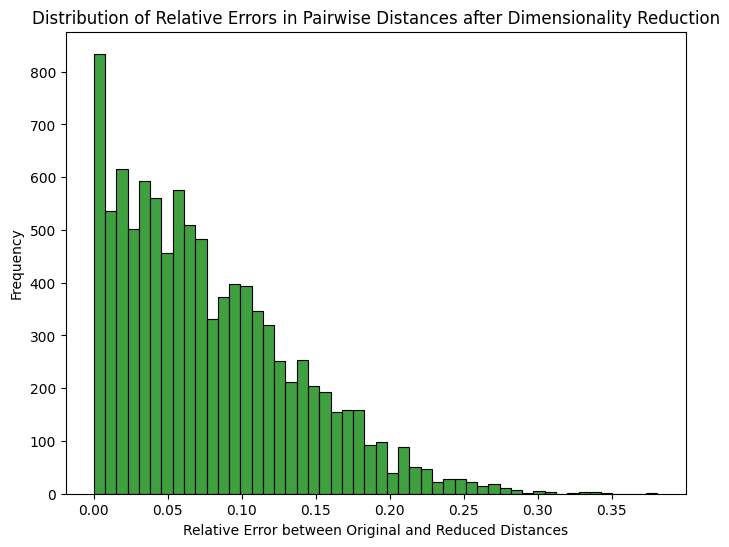

In [35]:
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.random_projection import GaussianRandomProjection

# TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numerical representations
# that capture the importance of words across multiple documents *WHAT IT IS*.

# ==========================
# Load Real-World Text Data (20 Newsgroups Dataset)
# ==========================
# The 20 Newsgroups dataset is a collection of documents from various online discussion groups.
# We select two categories ('sci.space' and 'rec.autos') to perform text classification experiments.
newsgroups = fetch_20newsgroups(subset='all', categories=['sci.space', 'rec.autos'], remove=('headers', 'footers', 'quotes'))
X_text = newsgroups.data[:100]  # Limiting to 100 samples for computational efficiency

# ==========================
# Convert Text to High-Dimensional TF-IDF Vectors
# ==========================
# The resulting vectors have 1000(most important words extracted from text) dimensions (features), simulating high-dimensional space.
vectorizer = TfidfVectorizer(max_features=1000)  # Restricting to 1000 words to manage dimensionality
X_tfidf = vectorizer.fit_transform(X_text).toarray()  # Convert sparse matrix to dense array

# ==========================
# Compute Pairwise Distances in the High-Dimensional Space
# ==========================
# Pairwise Euclidean distances measure how similar or different two text documents are in this space.
# We will later compare how well these distances are preserved after dimensionality reduction.
original_distances = pairwise_distances(X_tfidf, metric='euclidean')

# ==========================
# Apply Random Projection (RP) for Dimensionality Reduction
# ==========================
# We reduce the feature space from 1000 dimensions to 50.
# Random Projection (RP) is a technique that reduces dimensionality while approximately 
# preserving pairwise distances. It does this using a random transformation matrix.
num_reduced_dimensions = 50  # Target dimensionality after projection
random_projection_model = GaussianRandomProjection(n_components=num_reduced_dimensions)
X_reduced = random_projection_model.fit_transform(X_tfidf)

# ==========================
# Compute Pairwise Distances in the Reduced-Dimensional Space
# ==========================
# After dimensionality reduction, we recompute the pairwise distances
# to check how much information (distance structure) was preserved.
reduced_distances = pairwise_distances(X_reduced, metric='euclidean')

# ==========================
# Measure the Distortion of Distances Due to Projection
# ==========================
# Since we reduced the dimensions, some distortion in distances is expected.
# We compute the relative error between the original and projected distances:
# Relative Error = |Original Distance - Reduced Distance| / Original Distance
# If this value is low, it means RP effectively preserved the distances.
relative_error = np.abs(original_distances - reduced_distances) / original_distances
relative_error = np.nan_to_num(relative_error)  # Handle divisions by zero (avoid NaNs)

# ==========================
# Visualize the Distribution of Relative Errors
# ==========================
# The histogram shows how much distances changed after projection.
# A peak near zero means that RP worked well (most distances are preserved).
# If the error distribution is wide, then RP significantly distorted some distances.
plt.figure(figsize=(8, 6))
sns.histplot(relative_error.flatten(), kde=False, color='green', bins=50)
plt.title("Distribution of Relative Errors in Pairwise Distances after Dimensionality Reduction")
plt.xlabel("Relative Error between Original and Reduced Distances")
plt.ylabel("Frequency")
plt.show()

# High-Dimensional Text Data Analysis

In [4]:
from sklearn.metrics import pairwise_distances
import seaborn as sns

# Generates the random data points in a high-dimensional space
# For the experiment, we have 100 points in a 1000-dimensional space
num_points = 100 
num_dimensions = 1000  

# Randomly generates the data points, which are distributed between 0 and 1 in a 1000-dimensional space
high_dim_data = np.random.rand(num_points, num_dimensions)

# Computing the pairwise Euclidean distances between the points in the original high-dimensional space
# This helps us understand how far apart the points are from each other in the original space
original_distances = pairwise_distances(high_dim_data, metric='euclidean')

In [9]:
# Applying the Gaussian Random Projection to reduce the dimensionality
# After applying Random Projection, we aim to reduce the data to 50 dimensions
num_reduced_dimensions = 50 
random_projection_model = GaussianRandomProjection(n_components=num_reduced_dimensions)

# Performs the dimensionality reduction
reduced_data = random_projection_model.fit_transform(high_dim_data)

# Computing the pairwise distances in the reduced-dimensional space
# We want to compare how distances behave in the reduced space versus the original space
reduced_distances = pairwise_distances(reduced_data, metric='euclidean')

# Compares the pairwise distances before and after the dimensionality reduction
# We calculate the relative error between the distances in the original and reduced spaces
relative_error = np.abs(original_distances - reduced_distances) / original_distances

/var/folders/25/fr9mzrld3d3b9tgykkpjbs340000gn/T/ipykernel_89442/4233283255.py:15: RuntimeWarning: invalid value encountered in divide
  relative_error = np.abs(original_distances - reduced_distances) / original_distances


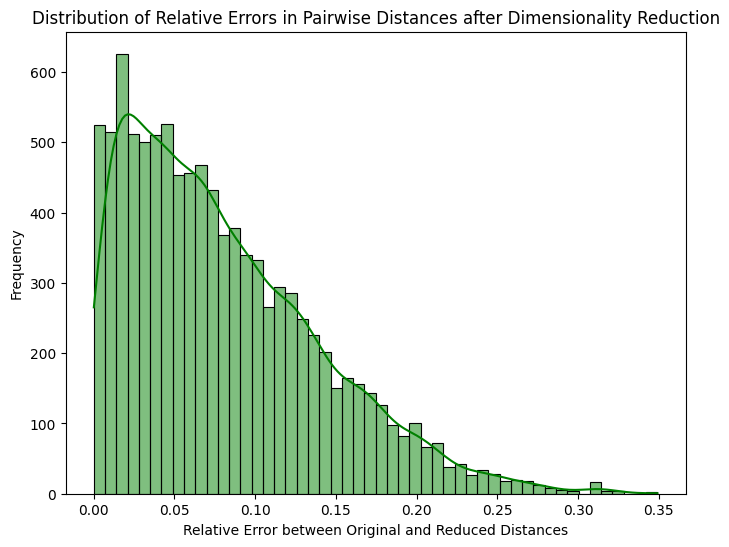

In [11]:
# Displays the relative error distribution through a visual
# This will show how much the distances have changed (how well Random Projection preserves distances)
# If the frequency is higher near the lower relative error value (closer to 0),
# it means that most of the pairwise distances in the high-dimensional space are very similar to the pairwise distances in the reduced space.
plt.figure(figsize=(8, 6))
sns.histplot(relative_error.flatten(), kde=True, color='green', bins=50)
plt.title("Distribution of Relative Errors in Pairwise Distances after Dimensionality Reduction")
plt.xlabel("Relative Error between Original and Reduced Distances")
plt.ylabel("Frequency")
plt.show()

# Equilaterial Triangle

In [17]:
np.random.seed(42)
R = np.random.rand(1,2) # random matrix

#Points
A = np.array([0,0])
B = np.array([2,0])
C = np.array([1,np.sqrt(3)])

# stacking ABC
X = np.column_stack([A, B, C]) 

# New data
new_data = np.random.randint(-5, 5, size=(2, 10))

# Projecting onto R
projection = R @ X


In [18]:
slope = R[0][1]/R[0][0] # rise/run

x_val = np.linspace(-4,4, 100)
y_val = slope*x_val

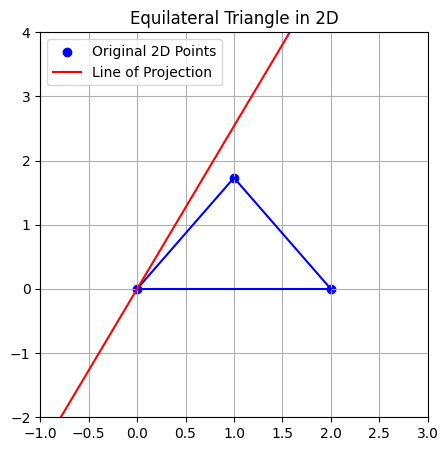

In [19]:
plt.figure(figsize=(5,5))

# Original 2D triangle
plt.scatter(X[0, :], X[1, :], color='blue', label='Original 2D Points')
plt.plot([A[0], B[0]], [A[1], B[1]], 'b-')
plt.plot([B[0], C[0]], [B[1], C[1]], 'b-')
plt.plot([C[0], A[0]], [C[1], A[1]], 'b-')
plt.plot(x_val,y_val, color="red", label = "Line of Projection")
plt.grid(True)
plt.xlim(-1,3)
plt.ylim(-2,4)
plt.title("Equilateral Triangle in 2D")
plt.legend()
plt.show()

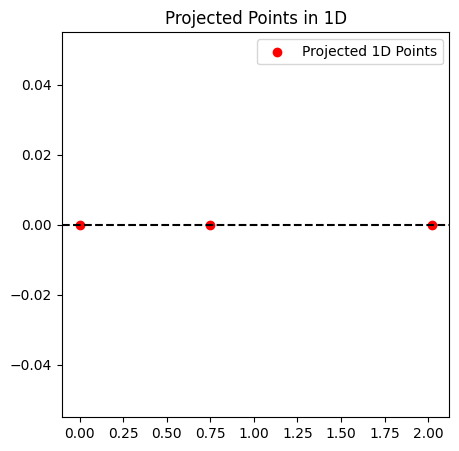

In [20]:
# Projected 1D points
plt.figure(figsize=(5,5))
plt.scatter(projection, [0, 0, 0], color='red', label='Projected 1D Points')
plt.title("Projected Points in 1D")
plt.axhline(0, color='black', linestyle='--')
plt.legend()

plt.show()